# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

In [271]:
# CSV files
filepath = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/'
csv_forest = filepath + "Deforest.xlsx"
csv_cornland = filepath + 'FAOSTAT_data_en_10-2-2024.csv'
csv_landcover = filepath + "FAOSTAT_data_en_11-18-2024.csv"

## Getting the Data

### Installing packages

In [272]:
pip install wbdata

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [273]:
pip install pycountry

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [274]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

### ISO3

In [275]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [276]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='VAT')

# Display the country name
country.name

'Holy See (Vatican City State)'

In [277]:
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    'Macao SAR, China': 'Macao',
    'St. Martin (French part)':'Saint Martin (French part)',
    'Curacao':'Curaçao',
    'Hong Kong SAR, China': 'Hong Kong'
    # You can add more mappings if necessary
}

In [278]:
country_not_country = [
    'Africa Eastern and Southern',
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Eastern and Southern Africa',
    'Western and Central Africa',
    'Not classified',
    'World'
]


### Cornfield Data

In [279]:
corn_field_data = pd.read_csv(csv_cornland)
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1961,1961,ha,500000,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1962,1962,ha,500000,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1963,1963,ha,500000,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1964,1964,ha,505000,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),1965,1965,ha,500000,A,Official figure,NaN


In [280]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [281]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [282]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [283]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [284]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [285]:
corn_field_data.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
39,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2000,2000,ha,96000,A,Official figure,NaN
40,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2001,2001,ha,80000,A,Official figure,NaN
41,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2002,2002,ha,100000,A,Official figure,NaN
42,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2003,2003,ha,250000,A,Official figure,NaN
43,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,112,Maize (corn),2004,2004,ha,250000,A,Official figure,NaN


In [286]:
#filter only the relevant columns
df_corn = corn_field_data
df_corn = df_corn[["Area","Value","Year"]]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [287]:
areas_to_exclude = df_corn[df_corn["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
df_corn = df_corn[~df_corn['Area'].isin(areas_to_exclude)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9543,Zimbabwe,1099945,2017
9544,Zimbabwe,1155075,2018
9545,Zimbabwe,991354,2019
9546,Zimbabwe,1018884,2020


In [288]:
#Missing values
df_corn.isna().sum()

Area     0
Value    0
Year     0
dtype: int64

In [289]:
value_counts_per_area = df_corn.groupby("Area")["Value"].count()

# Filter to get only the areas where the count is not equal to 22
areas_not_equal_to_22 = value_counts_per_area[value_counts_per_area != 22].index
areas_not_equal_to_22

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Eritrea', 'Eswatini',
       'Fiji', 'French Guiana', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mauritania', 'Montenegro', 'Mozambique', 'Namibia',
       'New Caledonia', 'Nigeria', 'Oman', 'Papua New Guinea', 'Puerto Rico',
       'Rwanda', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia',
       'Serbia and Montenegro', 'Sierra Leone', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Sudan (former)', 'Sweden', 'Tajikistan', 'Thailand',
 

In [290]:
df_corn = df_corn[~df_corn["Area"].isin(areas_not_equal_to_22)]
df_corn

,Area,Value,Year
39,Afghanistan,96000,2000
40,Afghanistan,80000,2001
41,Afghanistan,100000,2002
42,Afghanistan,250000,2003
43,Afghanistan,250000,2004
...,...,...,...
9481,Zambia,1433944,2017
9482,Zambia,1086006,2018
9483,Zambia,841693,2019
9484,Zambia,1333519,2020


In [291]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3
1057,Bolivia (Plurinational State of),307292,2000,None
1058,Bolivia (Plurinational State of),306118,2001,None
1059,Bolivia (Plurinational State of),310465,2002,None
1060,Bolivia (Plurinational State of),295509,2003,None
1061,Bolivia (Plurinational State of),313849,2004,None
...,...,...,...,...
7175,Republic of Korea,15074,2017,None
7176,Republic of Korea,15472,2018,None
7177,Republic of Korea,14840,2019,None
7178,Republic of Korea,15633,2020,None


In [292]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping_corn = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    # You can add more mappings if necessary
}

df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/1586715189.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [293]:
df_corn['iso3'] = df_corn['Area'].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/3983791102.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Area,Value,Year,iso3
1894,China_,23086228,2000,None
1895,China_,24310506,2001,None
1896,China_,24660837,2002,None
1897,China_,24092820,2003,None
1898,China_,25467145,2004,None
1899,China_,26379450,2005,None
1900,China_,28482649,2006,None
1901,China_,29496901,2007,None
1902,China_,29882708,2008,None
1903,China_,31203367,2009,None


In [294]:
df_corn = df_corn.dropna()
df_corn = df_corn.reset_index()
df_corn.drop('index', axis=1, inplace=True)
df_corn.rename(columns={'Area':'country', 'Value':'Total Size Cornfield in ha'}, inplace=True)
df_corn['Total Size Cornfield in sq km'] = df_corn['Total Size Cornfield in ha']*0.01
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


### Land size

In [295]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()

,country,date,Land area (sq. km)
0,Africa Eastern and Southern,2023,NaN
1,Africa Eastern and Southern,2022,NaN
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07


In [296]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]

avg_land_size_df = filtered_data
avg_land_size_df

,country,date,Land area (sq. km)
2,Africa Eastern and Southern,2021,1.484509e+07
3,Africa Eastern and Southern,2020,1.484509e+07
4,Africa Eastern and Southern,2019,1.484513e+07
5,Africa Eastern and Southern,2018,1.484512e+07
6,Africa Eastern and Southern,2017,1.484510e+07
...,...,...,...
16979,Zimbabwe,2004,3.868500e+05
16980,Zimbabwe,2003,3.868500e+05
16981,Zimbabwe,2002,3.868500e+05
16982,Zimbabwe,2001,3.868500e+05


In [297]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/1108197642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

,country,date,Land area (sq. km),iso3
2,Africa Eastern and Southern,2021,1.484509e+07,None
3,Africa Eastern and Southern,2020,1.484509e+07,None
4,Africa Eastern and Southern,2019,1.484513e+07,None
5,Africa Eastern and Southern,2018,1.484512e+07,None
6,Africa Eastern and Southern,2017,1.484510e+07,None
...,...,...,...,...
16851,"Yemen, Rep.",2004,5.279700e+05,None
16852,"Yemen, Rep.",2003,5.279700e+05,None
16853,"Yemen, Rep.",2002,5.279700e+05,None
16854,"Yemen, Rep.",2001,5.279700e+05,None


In [299]:
avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/344355826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
avg_land_size_df = avg_land_size_df[~avg_land_size_df['country'].isin(country_not_country)]

In [301]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/724237593.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,date,Land area (sq. km),iso3
9858,Kosovo,2021,NaN,None
9859,Kosovo,2020,NaN,None
9860,Kosovo,2019,NaN,None
9861,Kosovo,2018,NaN,None
9862,Kosovo,2017,NaN,None
9863,Kosovo,2016,NaN,None
9864,Kosovo,2015,NaN,None
9865,Kosovo,2014,NaN,None
9866,Kosovo,2013,NaN,None
9867,Kosovo,2012,NaN,None


In [302]:
avg_land_size_df = avg_land_size_df.dropna(subset=['iso3'])
avg_land_size_df.head()

,country,date,Land area (sq. km),iso3
3138,Afghanistan,2021,652230.0,AFG
3139,Afghanistan,2020,652230.0,AFG
3140,Afghanistan,2019,652230.0,AFG
3141,Afghanistan,2018,652230.0,AFG
3142,Afghanistan,2017,652230.0,AFG


In [303]:
avg_land_size_df = avg_land_size_df.reset_index()
avg_land_size_df.drop('index', axis=1, inplace=True)
avg_land_size_df.rename(columns={'Land area (sq. km)':'landArea','date':'Year'}, inplace=True)
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


### Create a table containing the x,y and heterogeneity variable

In [304]:
avg_land_size_df.head()

,country,Year,landArea,iso3
0,Afghanistan,2021,652230.0,AFG
1,Afghanistan,2020,652230.0,AFG
2,Afghanistan,2019,652230.0,AFG
3,Afghanistan,2018,652230.0,AFG
4,Afghanistan,2017,652230.0,AFG


In [305]:
df_corn.head()

,country,Total Size Cornfield in ha,Year,iso3,Total Size Cornfield in sq km
0,Afghanistan,96000,2000,AFG,960.0
1,Afghanistan,80000,2001,AFG,800.0
2,Afghanistan,100000,2002,AFG,1000.0
3,Afghanistan,250000,2003,AFG,2500.0
4,Afghanistan,250000,2004,AFG,2500.0


In [306]:
final_merged_df = pd.merge(avg_land_size_df, df_corn, on=['iso3', 'Year'], how='outer')

final_merged_df.head()

,country_x,Year,landArea,iso3,country_y,Total Size Cornfield in ha,Total Size Cornfield in sq km
0,Aruba,2000,180.0,ABW,NaN,NaN,NaN
1,Aruba,2001,180.0,ABW,NaN,NaN,NaN
2,Aruba,2002,180.0,ABW,NaN,NaN,NaN
3,Aruba,2003,180.0,ABW,NaN,NaN,NaN
4,Aruba,2004,180.0,ABW,NaN,NaN,NaN


In [307]:
final_merged_df.isnull().sum()

country_x                          22
Year                                0
landArea                           79
iso3                                0
country_y                        2816
Total Size Cornfield in ha       2816
Total Size Cornfield in sq km    2816
dtype: int64

In [308]:
# Check for missing values across each column and group by 'country'
missing_values_per_country = final_merged_df.groupby('country_x').apply(lambda x: x.isna().sum())

# Filter to show only countries with at least one missing value
countries_with_missing_values = missing_values_per_country[missing_values_per_country.sum(axis=1) > 0]

# Display the result
print(countries_with_missing_values)

                      country_x  Year  landArea  iso3  country_y  \
country_x                                                          
American Samoa                0     0         0     0         22   
Andorra                       0     0         0     0         22   
Antigua and Barbuda           0     0         0     0         22   
Aruba                         0     0         0     0         22   
Bahamas                       0     0         0     0         22   
...                         ...   ...       ...   ...        ...   
United Kingdom                0     0         0     0         22   
Vanuatu                       0     0         0     0         22   
Venezuela                     0     0         0     0         22   
Virgin Islands, U.S.          0     0         0     0         22   
Zimbabwe                      0     0         0     0         22   

                      Total Size Cornfield in ha  \
country_x                                          
American Sa

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/3302613329.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [309]:
final_merged_df.drop(['country_y'], axis=1, inplace=True)
final_merged_df.rename(columns={'country_x': 'Country'}, inplace=True)
final_merged_df = final_merged_df.dropna()
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km
22,Afghanistan,2000,652230.0,AFG,96000.0,960.00
23,Afghanistan,2001,652230.0,AFG,80000.0,800.00
24,Afghanistan,2002,652230.0,AFG,100000.0,1000.00
25,Afghanistan,2003,652230.0,AFG,250000.0,2500.00
26,Afghanistan,2004,652230.0,AFG,250000.0,2500.00
...,...,...,...,...,...,...
4703,Zambia,2017,743390.0,ZMB,1433944.0,14339.44
4704,Zambia,2018,743390.0,ZMB,1086006.0,10860.06
4705,Zambia,2019,743390.0,ZMB,841693.0,8416.93
4706,Zambia,2020,743390.0,ZMB,1333519.0,13335.19


In [310]:
final_merged_df = final_merged_df.reset_index(drop=True)
final_merged_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00
...,...,...,...,...,...,...
1887,Zambia,2017,743390.0,ZMB,1433944.0,14339.44
1888,Zambia,2018,743390.0,ZMB,1086006.0,10860.06
1889,Zambia,2019,743390.0,ZMB,841693.0,8416.93
1890,Zambia,2020,743390.0,ZMB,1333519.0,13335.19


In [311]:
last_df = final_merged_df

In [312]:
len(last_df['Country'].unique())

86

# **Heterogeneity variable** : Land available for corn expansion other than forests
### Why ?
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ?
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover :
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops
3. Woody crops
4. Multiple or layered crops (Not mapped)
5. Grassland
6. Tree-covered areas
7. Mangroves
8. Shrub-covered areas
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups :
1. Countries with forest coverage higher than # Heterogeneity variable : Land available for corn expansion other than forests
### Why ?
- __Direct Relevance to Corn Expansion__:
    This variable captures the potential for agricultural growth, specifically for corn, by estimating land areas that could feasibly be converted to cornfields.
    Unlike general measures of land availability, it focuses on lands that are ecologically and practically suitable for corn cultivation.

- __Variation Across Countries__:
    The variable inherently reflects differences between countries, such as urbanization levels, existing cropland distribution, and natural geographic constraints, making it an ideal heterogeneity factor.
    Countries with more available land for corn expansion may exhibit stronger links between corn expansion and deforestation, while those with limited availability may rely on intensification rather than land clearing.

- __Focus on Agricultural Pressure__:
    This variable aligns directly with the agricultural pressures driving deforestation, providing a more targeted perspective than broader variables like general cropland area.
### How is it constructed ?
We use a [database about Global Land Cover](https://www.fao.org/faostat/en/#data/LC) provided by FAO, where we have data for 247 countries, and for 14 classes of land cover :
1. Artificial surfaces (including urban and associated areas)
2. Herbaceous crops
3. Woody crops
4. Multiple or layered crops (Not mapped)
5. Grassland
6. Tree-covered areas
7. Mangroves
8. Shrub-covered areas
9. Shrubs and/or herbaceous vegetation, aquatic or regularly flooded
10. Sparsely natural vegetated areas (Not mapped)
11. Terrestrial barren land
12. Permanent snow and glaciers
13. Inland water bodies
14. Coastal water bodies and intertidal areas

We first will divide all values by the landsize of the country, so that we have the percentage of land in the country. Then to compute the final percentage of land available for corn expansion, we will compute the sum of land categories that seem suitable for corn expansion, so potentially convertible lands other than forests :  
- __Herbaceous crops__ : represents existing cropland already used for agricultural purposes. These lands are highly suitable for corn expansion and may involve crop rotation or intensification strategies
- __Grassland__ : Grasslands are often used as pastures but can be converted into cropland. These areas are considered moderately suitable for corn expansion, especially in regions with high land-use pressure
- __Shrub-covered areas__ : Shrublands, while less fertile than grasslands, can still be converted for agricultural use with proper inputs and management. These areas are often targeted in marginal expansions for crops like corn

The reasoning behing is that we might see a stronger relationship between corn expansion and deforestation in countries where there is little percentage of land available for corn expansion other than forests, specifically in countries where there is low regulation and high forest covers, because in these regions clearing forests can be economically cheaper, the sale of timber from deforestation provides an additional revenue stream, offsetting the costs of converting forests to farmland. In highly regulated or land-constrained regions, converting existing croplands rather than forests is more likely because there are strong regulations protect forests, infrastructure for existing croplands is already in place, and incentives encourage intensification (e.g., improving yields) over land expansion. We will split our dataset in 4 groups :
- Group 0 :  Countries with land suitable and available for corn expansion lower than its median
- Group 1 : Countries with land suitable and available for corn expansion higher than its median

In [313]:
landcover_data = pd.read_csv(csv_landcover)
landcover_data.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value',
       'Flag', 'Flag Description'],
      dtype='object')

In [314]:
len(landcover_data['Area'].unique())

247

In [315]:
def m49_to_iso3(m49_code):
    for country in pycountry.countries:
        if hasattr(country, 'numeric') and int(country.numeric) == m49_code:
            return country.alpha_3
    return None
landcover_data['iso3']=landcover_data['Area Code (M49)'].apply(m49_to_iso3)

In [316]:
len(landcover_data['iso3'].unique())

237

In [317]:
landcover_data[landcover_data['iso3'].isnull()]["Area"].unique()

array(['Belgium-Luxembourg', 'Channel Islands', 'China', 'Czechoslovakia',
       'Ethiopia PDR', 'Johnston Island', 'Midway Island',
       'Netherlands Antilles (former)', 'Serbia and Montenegro',
       'Sudan (former)', 'Wake Island'], dtype=object)

In [318]:
# Convert 'Value' from hectares to square meters
landcover_data['Value_sq_km'] = landcover_data['Value'] * 10# 1 hectare = 10,000 square meters

In [319]:
suitable_categories = ['Herbaceous Crops', 'Grassland', 'Shrubland']
suitable_land = landcover_data[landcover_data['Item'].isin(suitable_categories)]

In [320]:
suitable_land["Year"].min()

np.int64(1992)

In [321]:
suitable_land[suitable_land["Year"]==1992]["Area"].nunique()

237

In [322]:
suitable_land = suitable_land[suitable_land["Year"]==1992]
suitable_land = suitable_land[["Area", "iso3", "Value_sq_km"]]
suitable_land = suitable_land.dropna()
suitable_land.isnull().sum()

Area           0
iso3           0
Value_sq_km    0
dtype: int64

In [323]:
suitable_land.reset_index(drop = True, inplace = True)
suitable_land

,Area,iso3,Value_sq_km
0,Afghanistan,AFG,240353.9
1,Albania,ALB,4017.8
2,Algeria,DZA,8268.9
3,American Samoa,ASM,14.8
4,Andorra,AND,104.6
...,...,...,...
221,Wallis and Futuna Islands,WLF,11.0
222,Western Sahara,ESH,4.6
223,Yemen,YEM,1807.5
224,Zambia,ZMB,31703.6


In [324]:
#hetero_var = suitable_land.groupby(by=['Area','iso3','Year'])['Value_sq_km'].sum().reset_index()

In [325]:
#hetero_var_not_null = hetero_var.dropna()
#len(hetero_var_not_null['Area'].unique())

In [326]:
#no_iso3 = hetero_var[hetero_var['iso3'].isnull()]
#no_iso3['Area'].unique()

In [327]:
suitable_land.rename(columns={'Area': 'Country'}, inplace=True)

In [328]:
forests = landcover_data[landcover_data['Item']=='Tree-covered areas']
forests.rename(columns={'Area': 'Country'}, inplace=True)
forests.rename(columns={'Value_sq_km': 'Tree-covered areas in sq km'}, inplace=True)
forests = forests[['Country','iso3', 'Year', 'Element','Tree-covered areas in sq km']]
forests = forests.dropna()
len(forests['Country'].unique())

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/4269415020.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/4269415020.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



236

In [329]:
end_df = last_df

In [330]:
forests.head(30)

,Country,iso3,Year,Element,Tree-covered areas in sq km
269,Afghanistan,AFG,2015,Area from CGLS,9385.0
270,Afghanistan,AFG,2016,Area from CGLS,9379.6
271,Afghanistan,AFG,2017,Area from CGLS,9375.0
272,Afghanistan,AFG,2018,Area from CGLS,9372.7
273,Afghanistan,AFG,2019,Area from CGLS,9371.6
274,Afghanistan,AFG,2001,Area from MODIS,5101.7
275,Afghanistan,AFG,2002,Area from MODIS,5542.8
276,Afghanistan,AFG,2003,Area from MODIS,5225.7
277,Afghanistan,AFG,2004,Area from MODIS,4937.5
278,Afghanistan,AFG,2005,Area from MODIS,4774.0


In [331]:
df_final = pd.merge(last_df, suitable_land, on=['iso3'], how='outer')
df_final1 = pd.merge(df_final,forests,on=['iso3', 'Year'], how='outer')
df_final1['Total Size Land suitable for corn expansion (sq km)'] = (df_final1['Value_sq_km']-df_final1['Total Size Cornfield in sq km'])
df_final1 = df_final1.drop(columns=['Value_sq_km'])
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km)
0,NaN,1992.0,NaN,ABW,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
1,NaN,1993.0,NaN,ABW,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
2,NaN,1994.0,NaN,ABW,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
3,NaN,1995.0,NaN,ABW,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
4,NaN,1996.0,NaN,ABW,NaN,NaN,NaN,Aruba,Area from CCI_LC,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14169,NaN,2021.0,NaN,ZWE,NaN,NaN,NaN,Zimbabwe,Area from CCI_LC,116686.1,NaN
14170,NaN,2021.0,NaN,ZWE,NaN,NaN,NaN,Zimbabwe,Area from WorldCover,90796.5,NaN
14171,NaN,2022.0,NaN,ZWE,NaN,NaN,NaN,Zimbabwe,Area from MODIS,32691.0,NaN
14172,NaN,2022.0,NaN,ZWE,NaN,NaN,NaN,Zimbabwe,Area from CCI_LC,116696.6,NaN


In [332]:
#let's compare Tree-covered areas and Forest Areas from the other dataset
#df_final1['Forest area (sq km)']=(df_final1['% of Forest Area']/100)*df_final1['landArea']
df_final1['% Land available']=df_final1['Total Size Land suitable for corn expansion (sq km)']/df_final1['landArea']
df_final1=df_final1.dropna()
df_final1

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Country_y,Country,Element,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available
69,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,Afghanistan,Afghanistan,Area from CCI_LC,12281.1,239393.90,0.367039
70,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,Afghanistan,Afghanistan,Area from MODIS,5101.7,239553.90,0.367284
71,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,Afghanistan,Afghanistan,Area from CCI_LC,11975.3,239553.90,0.367284
72,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,Afghanistan,Afghanistan,Area from MODIS,5542.8,239353.90,0.366978
73,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,Afghanistan,Afghanistan,Area from CCI_LC,11851.1,239353.90,0.366978
...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,Zambia,Zambia,Area from CCI_LC,471548.3,18368.41,0.024709
14107,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,Zambia,Zambia,Area from WorldCover,297631.3,18368.41,0.024709
14108,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,Zambia,Zambia,Area from MODIS,517240.9,17602.58,0.023679
14109,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,Zambia,Zambia,Area from CCI_LC,471264.1,17602.58,0.023679


In [333]:
df_final1 = df_final1[df_final1['Element']=='Area from CCI_LC']
df_final1 = df_final1.drop(["Country_y", "Country", "Element"], axis=1)
df_final1 = df_final1.rename(columns={"Country_x":"Country"})

In [334]:
len(df_final1['Country'].unique())

81

In [335]:
last_df=df_final1

### Corn Price Data

**Corn Price per bushel ($)**: The international corn futures data requires higher-level access but the time series behave identically.

In [336]:
corn_price_data = pd.read_csv(filepath + "corn-prices-historical-chart-data.csv",skiprows=15)
corn_price_data['date'] = pd.to_datetime(corn_price_data['date'],format='mixed')
corn_price_data = corn_price_data[corn_price_data['date'].dt.year >= 2000]
yearly_price_data = corn_price_data.resample('Y', on='date').last()
yearly_price_data.index = yearly_price_data.index.year
yearly_price_data = (
    yearly_price_data
    .reset_index()  # Reset the index to make it a column
)

# Strip white spaces from column names
yearly_price_data.columns = yearly_price_data.columns.str.strip()

# Rename the columns
yearly_price_data = yearly_price_data.rename(columns={"date": "Year", "value": "Corn_Price_Per_Bushel"})
yearly_price_data.head()

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_6935/1460633811.py:4: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,Year,Corn_Price_Per_Bushel
0,2000,2.3175
1,2001,2.0900
2,2002,2.3575
3,2003,2.4600
4,2004,2.0475


In [337]:
yearly_price_data.columns

Index(['Year', 'Corn_Price_Per_Bushel'], dtype='object')

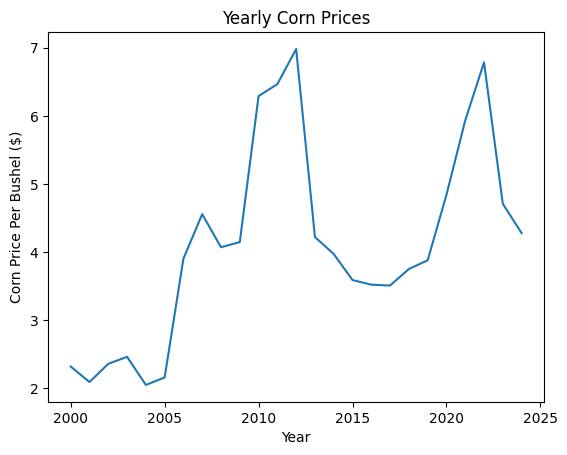

In [338]:
# Plot the yearly price data
yearly_price_data.set_index(["Year"]).plot(label="Corn Price Per Bushel ($)", legend=False)

# Add labels and title
plt.xlabel("Year")  # X-axis label
plt.ylabel("Corn Price Per Bushel ($)")  # Y-axis label

# Show the plot
plt.title("Yearly Corn Prices")  # Optional: Add a title for the plot
plt.show()

In [339]:
last_df = pd.merge(last_df, yearly_price_data, on  = "Year" , how = "left")
last_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.0,12281.1,239393.9,0.367039,2.3175
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.0,11975.3,239553.9,0.367284,2.0900
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.0,11851.1,239353.9,0.366978,2.3575
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.0,11735.3,237853.9,0.364678,2.4600
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.0,11667.1,237853.9,0.364678,2.0475


### Delta ºT

In [340]:
temp_data = pd.read_csv(filepath + "FAO_Temperature.csv")
temp_data = temp_data[temp_data["Months"] == "Meteorological year"]
temp_data = temp_data[temp_data['Year'] >= 2000]
temp_data = temp_data[temp_data['Year'] <= 2021]
temp_data = temp_data.dropna()
temp_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
1047,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2000,2000,°c,1.064,E,Estimated value
1048,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2001,2001,°c,1.377,E,Estimated value
1049,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2002,2002,°c,1.457,E,Estimated value
1050,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2003,2003,°c,0.710,E,Estimated value
1051,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7020,Meteorological year,2004,2004,°c,1.482,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241886,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2017,2017,°c,0.243,E,Estimated value
241887,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2018,2018,°c,0.636,E,Estimated value
241888,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2019,2019,°c,1.199,E,Estimated value
241889,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7020,Meteorological year,2020,2020,°c,0.581,E,Estimated value


In [341]:
value_counts_per_area = temp_data.groupby("Area")["Value"].count()

area_not_equal_to_22 = value_counts_per_area[value_counts_per_area !=22].index
area_not_equal_to_22

Index(['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Burundi',
       'Cabo Verde', 'Cayman Islands', 'Christmas Island', 'Costa Rica',
       'Djibouti', 'Dominica', 'Eritrea', 'Guadeloupe', 'Kiribati',
       'Midway Island', 'Montenegro', 'Montserrat',
       'Netherlands Antilles (former)', 'Norfolk Island', 'Palau', 'Pitcairn',
       'Puerto Rico', 'Rwanda', 'Réunion', 'Saint Kitts and Nevis', 'Samoa',
       'Serbia', 'Serbia and Montenegro', 'Sierra Leone', 'Singapore',
       'Solomon Islands', 'South Georgia and the South Sandwich Islands',
       'South Sudan', 'Sudan', 'Sudan (former)', 'Timor-Leste',
       'United States Virgin Islands', 'Wake Island'],
      dtype='object', name='Area')

In [342]:
temp_data = temp_data[~temp_data["Area"].isin(area_not_equal_to_22)]
temp_data = temp_data[['Area', 'Year', 'Value']]
temp_data

,Area,Year,Value
1047,Afghanistan,2000,1.064
1048,Afghanistan,2001,1.377
1049,Afghanistan,2002,1.457
1050,Afghanistan,2003,0.710
1051,Afghanistan,2004,1.482
...,...,...,...
241886,Zimbabwe,2017,0.243
241887,Zimbabwe,2018,0.636
241888,Zimbabwe,2019,1.199
241889,Zimbabwe,2020,0.581


In [343]:
temp_data['iso3'] = temp_data['Area'].apply(get_iso3)
temp_data[temp_data['iso3'].isnull()]["Area"].unique()

array(['Bolivia (Plurinational State of)', 'Channel Islands',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Democratic Republic of the Congo',
       'Holy See', 'Iran (Islamic Republic of)',
       'Micronesia (Federated States of)', 'Netherlands (Kingdom of the)',
       'Palestine', 'Republic of Korea', 'Svalbard and Jan Mayen Islands',
       'Venezuela (Bolivarian Republic of)', 'Wallis and Futuna Islands'],
      dtype=object)

In [344]:
country_mapping_temp = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    'China, Hong Kong SAR': 'Hong Kong',
    'Holy See':'Holy See (Vatican City State)',
    'Palestine': 'Palestine, State of',
    'Svalbard and Jan Mayen Islands':'Svalbard and Jan Mayen',
    'Wallis and Futuna Islands':'Wallis and Futuna',
    # You can add more mappings if necessary
}

temp_data['Area'] = temp_data['Area'].replace(country_mapping_temp)
temp_data['iso3'] = temp_data['Area'].apply(get_iso3)
temp_data[temp_data['iso3'].isnull()]["Area"].unique()

array(['Channel Islands', 'China_', 'China, Macao SAR'], dtype=object)

In [345]:
temp_data = temp_data.dropna()
temp_data = temp_data.reset_index()
temp_data.drop('index', axis=1, inplace=True)
temp_data.rename(columns={'Area':'Country', 'Value':'Temperature Change'}, inplace=True)
temp_data

,Country,Year,Temperature Change,iso3
0,Afghanistan,2000,1.064,AFG
1,Afghanistan,2001,1.377,AFG
2,Afghanistan,2002,1.457,AFG
3,Afghanistan,2003,0.710,AFG
4,Afghanistan,2004,1.482,AFG
...,...,...,...,...
4241,Zimbabwe,2017,0.243,ZWE
4242,Zimbabwe,2018,0.636,ZWE
4243,Zimbabwe,2019,1.199,ZWE
4244,Zimbabwe,2020,0.581,ZWE


In [346]:
last_df = pd.merge(last_df,temp_data, on=['iso3','Year'], how='outer')
last_df = last_df.drop(["Country_y"], axis=1)
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.0,12281.1,239393.9,0.367039,2.3175,1.064
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.0,11975.3,239553.9,0.367284,2.0900,1.377
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.0,11851.1,239353.9,0.366978,2.3575,1.457
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.0,11735.3,237853.9,0.364678,2.4600,0.710
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.0,11667.1,237853.9,0.364678,2.0475,1.482
...,...,...,...,...,...,...,...,...,...,...,...
4285,NaN,2017.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,0.243
4286,NaN,2018.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,0.636
4287,NaN,2019.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,1.199
4288,NaN,2020.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,0.581


In [347]:
last_df = last_df.rename(columns={'Country_x':'Country'})

In [348]:
last_df = last_df.dropna()
last_df = last_df.reset_index()
last_df.drop('index', axis=1, inplace=True)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482
...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386


### Average Temperature

Source: https://ourworldindata.org/grapher/monthly-average-surface-temperatures-by-year

In [349]:
avg_temp_df = pd.read_csv("./Data/monthly-average-surface-temperatures-by-year.csv")
avg_temp_df = avg_temp_df.drop(["Year"], axis = 1)
avg_temp_df = (avg_temp_df
               .groupby(by = ["Entity","Code"])
               .mean()
               .reset_index())
avg_temp_df = pd.melt(
    avg_temp_df,
    id_vars=["Entity", "Code"],  # Keep these columns fixed
    var_name="Reported_Year",    # Avoid using "Year" to prevent conflicts
    value_name="Temperature"     # Rename the values column
)

# Convert Reported_Year to integer
avg_temp_df["Reported_Year"] = avg_temp_df["Reported_Year"].astype(int)

# Apply the query with numeric comparison
avg_temp_df = (avg_temp_df
               .query("2000 <= Reported_Year <= 2021")
               .rename(columns = {"Temperature":"Average_Temperature",
                                  "Code":"iso3",
                                  "Reported_Year" : "Year"}))
avg_temp_df.head()

,Entity,iso3,Year,Average_Temperature
585,Afghanistan,AFG,2021,13.982914
586,Albania,ALB,2021,13.125356
587,Algeria,DZA,2021,25.220117
588,American Samoa,ASM,2021,26.756304
589,Andorra,AND,2021,5.152789


In [350]:
last_df = pd.merge(last_df,avg_temp_df,on = ["iso3","Year"],how = "left")
last_df.head()

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,Entity,Average_Temperature
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.0,12281.1,239393.9,0.367039,2.3175,1.064,Afghanistan,12.586175
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.0,11975.3,239553.9,0.367284,2.0900,1.377,Afghanistan,13.413867
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.0,11851.1,239353.9,0.366978,2.3575,1.457,Afghanistan,13.051083
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.0,11735.3,237853.9,0.364678,2.4600,0.710,Afghanistan,12.485457
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.0,11667.1,237853.9,0.364678,2.0475,1.482,Afghanistan,13.233360


In [351]:
last_df = last_df.drop(["Entity"], axis=1)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,Average_Temperature
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360
...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939


### GDP

In [352]:
gdp_data = pd.read_csv(filepath + "FAOSTAT_GDP.csv")
gdp_data = gdp_data[gdp_data['Year'] >= 2000]
gdp_data = gdp_data[gdp_data['Year'] <= 2021]
gdp_data.drop('Note', axis=1, inplace=True)
gdp_data = gdp_data.dropna()
gdp_data

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
30,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2000,2000,million USD,3531.869351,X,Figure from international organizations
31,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2001,2001,million USD,3620.525250,X,Figure from international organizations
32,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2002,2002,million USD,4285.191376,X,Figure from international organizations
33,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2003,2003,million USD,4898.791114,X,Figure from international organizations
34,MK,Macro Indicators,4,Afghanistan,6110,Value US$,22008,Gross Domestic Product,2004,2004,million USD,5504.073142,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2017,2017,million USD,22040.654699,X,Figure from international organizations
10866,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2018,2018,million USD,23645.265549,X,Figure from international organizations
10867,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2019,2019,million USD,22594.520375,X,Figure from international organizations
10868,MK,Macro Indicators,716,Zimbabwe,6110,Value US$,22008,Gross Domestic Product,2020,2020,million USD,21664.745864,X,Figure from international organizations


In [353]:
value_counts_per_area = gdp_data.groupby("Area")["Value"].count()

area_not_equal_to_22 = value_counts_per_area[value_counts_per_area !=22].index
area_not_equal_to_22

Index(['Curaçao', 'Netherlands Antilles (former)', 'Sint Maarten (Dutch part)',
       'South Sudan', 'Sudan', 'Sudan (former)'],
      dtype='object', name='Area')

In [354]:
gdp_data = gdp_data[~gdp_data["Area"].isin(area_not_equal_to_22)]
gdp_data = gdp_data[['Area', 'Year', 'Value']]
gdp_data

,Area,Year,Value
30,Afghanistan,2000,3531.869351
31,Afghanistan,2001,3620.525250
32,Afghanistan,2002,4285.191376
33,Afghanistan,2003,4898.791114
34,Afghanistan,2004,5504.073142
...,...,...,...
10865,Zimbabwe,2017,22040.654699
10866,Zimbabwe,2018,23645.265549
10867,Zimbabwe,2019,22594.520375
10868,Zimbabwe,2020,21664.745864


In [355]:
gdp_data['iso3'] = gdp_data['Area'].apply(get_iso3)
gdp_data[gdp_data['iso3'].isnull()]["Area"].unique()

array(['Bolivia (Plurinational State of)', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland',
       'Democratic Republic of the Congo', 'Iran (Islamic Republic of)',
       'Micronesia (Federated States of)', 'Netherlands (Kingdom of the)',
       'Palestine', 'Republic of Korea',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

In [356]:
country_mapping_temp = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China': 'China_',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    'China, Hong Kong SAR': 'Hong Kong',
    'Palestine': 'Palestine, State of',
    # You can add more mappings if necessary
}

gdp_data['Area'] = gdp_data['Area'].replace(country_mapping_temp)
gdp_data['iso3'] = gdp_data['Area'].apply(get_iso3)
gdp_data[gdp_data['iso3'].isnull()]["Area"].unique()

array(['China_', 'China, Macao SAR'], dtype=object)

In [357]:
gdp_data = gdp_data.dropna()
gdp_data = gdp_data.reset_index()
gdp_data.drop('index', axis=1, inplace=True)
gdp_data.rename(columns={'Area':'Country', 'Value':'GDP'}, inplace=True)
gdp_data

,Country,Year,GDP,iso3
0,Afghanistan,2000,3531.869351,AFG
1,Afghanistan,2001,3620.525250,AFG
2,Afghanistan,2002,4285.191376,AFG
3,Afghanistan,2003,4898.791114,AFG
4,Afghanistan,2004,5504.073142,AFG
...,...,...,...,...
4505,Zimbabwe,2017,22040.654699,ZWE
4506,Zimbabwe,2018,23645.265549,ZWE
4507,Zimbabwe,2019,22594.520375,ZWE
4508,Zimbabwe,2020,21664.745864,ZWE


In [358]:
last_df = pd.merge(last_df,gdp_data, on=['iso3','Year'], how='outer')
last_df = last_df.drop(["Country_y"], axis=1)
last_df

,Country_x,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,Average_Temperature,GDP
0,NaN,2000.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1873.452514
1,NaN,2001.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896.456983
2,NaN,2002.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.843575
3,NaN,2003.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2044.111732
4,NaN,2004.0,NaN,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2254.830726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,NaN,2017.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22040.654699
4506,NaN,2018.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23645.265549
4507,NaN,2019.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22594.520375
4508,NaN,2020.0,NaN,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21664.745864


In [359]:
last_df = last_df.rename(columns={'Country_x':'Country'})
last_df = last_df.dropna()
last_df = last_df.reset_index()
last_df.drop('index', axis=1, inplace=True)
last_df

,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,Tree-covered areas in sq km,Total Size Land suitable for corn expansion (sq km),% Land available,Corn_Price_Per_Bushel,Temperature Change,Average_Temperature,GDP
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790


In [360]:
last_df["Country"].nunique()

79

### Rainfall

### The standard deviation of The Bayesian Corruption Indicator (bci_bcistd)

### Government Eﬀectiveness, Estimate

### Political Stability and Absence of Violence/Terrorism, Estimate

### Global Peace Index

### Rainfall dataset

Source: https://data.worldbank.org/indicator/AG.LND.PRCP.MM?utm_source=chatgpt.com

**Content of data**:

 - Average precipitation in depth (mm per year)
 - Average precipitation is the long-term average in depth (over space and time) of annual precipitation in the country. Precipitation is defined as any kind of water that falls from clouds as a liquid or a solid.



In [361]:
#rainfall_df = pd.read_excel("./Data/rainfall_data.xls")
#rainfall_df.head()

# COLS Renaming

In [362]:
last_df.keys()

Index(['Country', 'Year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'Total Size Cornfield in sq km', 'Tree-covered areas in sq km',
       'Total Size Land suitable for corn expansion (sq km)',
       '% Land available', 'Corn_Price_Per_Bushel', 'Temperature Change',
       'Average_Temperature', 'GDP'],
      dtype='object')

In [363]:
last_df.rename(columns={'Total Size Cornfield in sq km':'corn',
                        'Tree-covered areas in sq km':'forest',
                        'Total Size Land suitable for corn expansion (sq km)':'suitability',
                        'Suitable_Land_Higher_Than_Median':'heterogeneityDummy',
                        'Corn_Price_Per_Bushel':'price',
                        'Temperature Change':'temperature',
                        'Log Corn':'logcorn',
                        'Log Forest':'logforest',
                        'Log Land':'logland',
                        'Year':'year',
                        'Country':'country',
                        'GDP':'gdp'},inplace=True)

In [364]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', 'forest', 'suitability', '% Land available', 'price',
       'temperature', 'Average_Temperature', 'gdp'],
      dtype='object')

In [365]:
last_df.to_csv('./Data/Database.csv', index=False) #save the data to a csv file